# Demo

This notebook provides a simple demo of the basic filling algorithm.  We start off by loading all the libraries that we will need for our demo and setting the example data

In [1]:
# setup the path so it can find popfill
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt

import numpy as np

mask_file = "../data/mask_clip_simple.tif"
population_file = "../data/pop_clip_simple.tif"


def plot_bool(data):
    print(np.sum(data))
    plt.imshow(data, interpolation='none', cmap='gray')

def plot_real(data):
    p = data.copy()
    plt.imshow(data, cmap='gray', interpolation='none')
    plt.colorbar()



# Load & Process Data

Next, we load the data and run the filling algorithm.

In [2]:
import popfill.loader
loader = popfill.loader.PopulationLoader()
mask, population = loader.load(mask_file, population_file)

import popfill.kernel
filler = popfill.kernel.Basic(mask.data, population.data)
new_counts = filler.fill()

# Some Visual Inspection

Lets look at a few peices of data.  First, lets look at the pixels with data that should be moved in the final output.

58


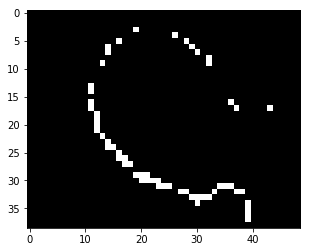

In [3]:
plot_bool(filler.to_remove())

Next, we identify all the pixels that should have data added in the final output

1


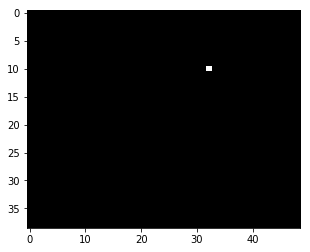

In [4]:
plot_bool(filler.to_add())

Next, we can look at the resulting image.

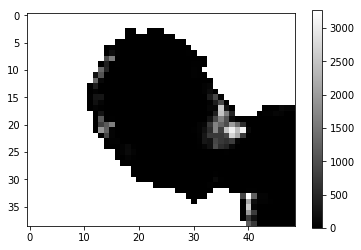

In [5]:
plot_real(new_counts)

# Examining the difference

Finally, we take a look at the difference between our updated population and the original population.  The figure shows pixels that have lost population.  Those pixels were in the region to be removed.  Also note that we cannot see anything for the region that was added to.  This is because `np.nan - <any int>` is `np.nan`

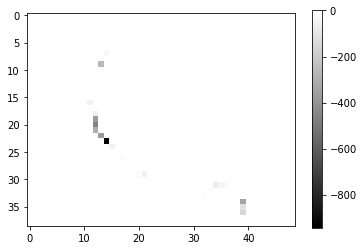

In [6]:
plot_real(new_counts-population.data)